In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data=pd.read_csv("train_data (1).csv")

In [ ]:
data.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [ ]:
data.drop("loan_id",axis=1,inplace=True)

In [ ]:
data.proof_submitted.unique()

array(['Aadhar', 'VoterID', 'Driving', 'PAN', 'Passport'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['proof_submitted']=le.fit_transform(data["proof_submitted"])

In [ ]:
data.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,0,504264,820920,2,2,0,0
1,48,1.0,0,728556,831444,6,2,0,0
2,30,2.0,4,642936,826092,0,0,0,1
3,28,1.0,0,746556,930924,0,0,0,0
4,29,1.0,0,1139880,1902000,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()
data[['loan_amount','asset_cost']]=scl.fit_transform(data[['loan_amount','asset_cost']])

In [ ]:
x=data.drop("loan_default",axis=1)
y=data["loan_default"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=8,train_size=0.3)

([<matplotlib.axis.XTick at 0x7f91f73ff710>,
 <a list of 21 Text major ticklabel objects>)

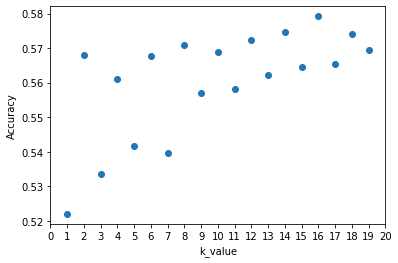

In [ ]:
k_range = range(1,20)
scores = []
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors = k)
 knn.fit(X_train, y_train)
 scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k_value')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,21))

In [ ]:
x.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,27,1.0,0,0.208481,0.178620,2,2,0
1,48,1.0,0,0.347491,0.184029,6,2,0
2,30,2.0,4,0.294427,0.181278,0,0,0
3,28,1.0,0,0.358647,0.235153,0,0,0
4,29,1.0,0,0.602419,0.734203,0,0,0


In [ ]:
x['education'].unique()

array([ 1.,  2., nan])

In [ ]:
x['education']=x['education'].fillna(0)

In [ ]:
x['education'].unique()

array([1., 2., 0.])

In [ ]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x,y)

KNeighborsClassifier()

In [ ]:
test=pd.read_csv("test_data.csv")

In [ ]:
test.drop("loan_id",axis=1,inplace=True)

In [ ]:
le=LabelEncoder()
test['proof_submitted']=le.fit_transform(test["proof_submitted"])

In [ ]:
test.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,29,1.0,0,636936,768240,2,2,0
1,28,1.0,0,548988,693060,3,3,0
2,28,1.0,0,651756,936600,0,0,0
3,45,2.0,0,614676,744840,4,3,0
4,48,1.0,0,625236,839400,0,0,0


In [ ]:
scl=MinMaxScaler()
test[['loan_amount','asset_cost']]=scl.fit_transform(test[['loan_amount','asset_cost']])

In [ ]:
test.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,29,1.0,0,0.332037,0.157682,2,2,0
1,28,1.0,0,0.269540,0.117853,3,3,0
2,28,1.0,0,0.342568,0.246875,0,0,0
3,45,2.0,0,0.316219,0.145285,4,3,0
4,48,1.0,0,0.323723,0.195381,0,0,0


In [ ]:
test.isnull().sum()

age                  0
education           92
proof_submitted      0
loan_amount          0
asset_cost           0
no_of_loans          0
no_of_curr_loans     0
last_delinq_none     0
dtype: int64

In [ ]:
test["education"]=test['education'].fillna(0)

In [ ]:
test.head()

,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,29,1.0,0,0.332037,0.157682,2,2,0
1,28,1.0,0,0.269540,0.117853,3,3,0
2,28,1.0,0,0.342568,0.246875,0,0,0
3,45,2.0,0,0.316219,0.145285,4,3,0
4,48,1.0,0,0.323723,0.195381,0,0,0


In [ ]:
model.predict(test)

array([0, 0, 1, ..., 0, 1, 0])